<a href="https://colab.research.google.com/github/Vivek-pareek/SMAI_Assignments/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RNN**
A recurrent neural network (RNN) is a class of artificial neural network where connections between units form a directed cycle. This creates an internal state of the network which allows it to exhibit dynamic temporal behavior.

IMDB sentiment classification task

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. IMDB provided a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

You can download the dataset from http://ai.stanford.edu/~amaas/data/sentiment/  or you can directly use 
" from keras.datasets import imdb " to import the dataset.

Few points to be noted:
Modules like SimpleRNN, LSTM, Activation layers, Dense layers, Dropout can be directly used from keras
For preprocessing, you can use required 

In [ ]:
#load the imdb dataset
# Note, I have referred https://towardsdatascience.com/a-beginners-guide-on-sentiment-analysis-with-rnn-9e100627c02e 
from keras.datasets import imdb

vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17473536/17464789 [==============================] - 0s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


In [ ]:
#the review is stored as a sequence of integers. 
# These are word IDs that have been pre-assigned to individual words, and the label is an integer

print('---review---')
print(X_train[1])
print('---label---')
print(y_train[1])

# to get the actual review
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[1]])
print('---label---')
print(y_train[1])

---review---
[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
---label---
0
1654784/1641221 [==============================] - 0s 0us/step
---review with words---
['the', 'thought', 'solid', 'thought', 'and', 'do', 'making', 'to', 'is', 'spot', 'n

In [ ]:
#pad sequences (write your code here)
import numpy as np
from keras.preprocessing import sequence

length_list = [len(review) for review in X_train]

mean, std = int(np.mean(length_list)), int(np.std(length_list))

print("mean length of review = {} std of review length = {}".format(mean, std))

#Assuming reviews length follow normal distribution, we take max_len to be mean + std
X_train = sequence.pad_sequences(X_train, maxlen = mean + std)
X_test = sequence.pad_sequences(X_test, maxlen = mean + std)



mean length of review = 238 std of review length = 176


In [ ]:
#design a RNN model (write your code)

from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout

embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length = mean + std))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 414, 32)           160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 162,113
Trainable params: 162,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train and evaluate your model
#choose your loss function and optimizer and mention the reason to choose that particular loss function and optimizer
# use accuracy as the evaluation metric

#Binary cross entropy loss suits for binary classification, hence we choose that
#We choose adam optimizer as it converges faster to minima loss
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
batch_size = 128
num_epochs = 10
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model_history = model.fit(X_train2, y_train2, validation_data = (X_valid, y_valid), 
          batch_size = batch_size, epochs = num_epochs)

Epoch 1/10
195/195 [==============================] - 25s 124ms/step - loss: 0.5776 - accuracy: 0.6959 - val_loss: 0.4062 - val_accuracy: 0.8359
Epoch 2/10
195/195 [==============================] - 23s 120ms/step - loss: 0.3508 - accuracy: 0.8525 - val_loss: 0.3252 - val_accuracy: 0.8672
Epoch 3/10
195/195 [==============================] - 24s 121ms/step - loss: 0.2746 - accuracy: 0.8912 - val_loss: 0.2753 - val_accuracy: 0.8984
Epoch 4/10
195/195 [==============================] - 23s 120ms/step - loss: 0.3169 - accuracy: 0.8648 - val_loss: 0.3791 - val_accuracy: 0.8125
Epoch 5/10
195/195 [==============================] - 23s 120ms/step - loss: 0.2878 - accuracy: 0.8822 - val_loss: 0.3132 - val_accuracy: 0.8750
Epoch 6/10
195/195 [==============================] - 23s 118ms/step - loss: 0.1838 - accuracy: 0.9321 - val_loss: 0.2655 - val_accuracy: 0.8906
Epoch 7/10
195/195 [==============================] - 24s 122ms/step - loss: 0.1103 - accuracy: 0.9649 - val_loss: 0.3393 - val_ac

In [ ]:
#evaluate the model using model.evaluate()
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8147199749946594


# **LSTM**

Instead of using a RNN, now try using a LSTM model and compare both of them. Which of those performed better and why ?


In [ ]:
from keras.layers import LSTM

embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length = mean + std))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 414, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
batch_size = 128
num_epochs = 10
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
lstm_model_history = model.fit(X_train2, y_train2, validation_data = (X_valid, y_valid), 
          batch_size = batch_size, epochs = num_epochs)

Epoch 1/10
195/195 [==============================] - 55s 272ms/step - loss: 0.5103 - accuracy: 0.7527 - val_loss: 0.3242 - val_accuracy: 0.8594
Epoch 2/10
195/195 [==============================] - 52s 267ms/step - loss: 0.2821 - accuracy: 0.8871 - val_loss: 0.2407 - val_accuracy: 0.8906
Epoch 3/10
195/195 [==============================] - 52s 268ms/step - loss: 0.2190 - accuracy: 0.9162 - val_loss: 0.2343 - val_accuracy: 0.8984
Epoch 4/10
195/195 [==============================] - 52s 269ms/step - loss: 0.1929 - accuracy: 0.9276 - val_loss: 0.2535 - val_accuracy: 0.8984
Epoch 5/10
195/195 [==============================] - 53s 271ms/step - loss: 0.1704 - accuracy: 0.9373 - val_loss: 0.2605 - val_accuracy: 0.8906
Epoch 6/10
195/195 [==============================] - 53s 270ms/step - loss: 0.1608 - accuracy: 0.9413 - val_loss: 0.2563 - val_accuracy: 0.8906
Epoch 7/10
195/195 [==============================] - 53s 270ms/step - loss: 0.1431 - accuracy: 0.9483 - val_loss: 0.3066 - val_ac

In [ ]:
#evaluate the model using model.evaluate()
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8633599877357483


<u>Note</u>: LSTM model performs better than vanilla RNN model as seen by the 
accuracy of models on test data. This is as expected because LSTM have cells 
which means it has more memory than RNN, this helps it to remember inputs for 
a longer period of time helps in realizing dependency in input.

Perform Error analysis and explain using few examples.

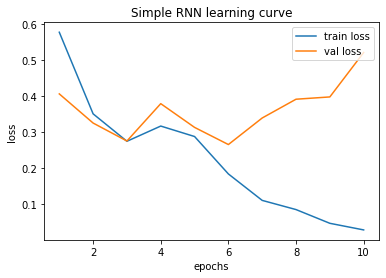

In [ ]:
import matplotlib.pyplot as plt


accuracy, loss = model_history.history["accuracy"], model_history.history["loss"]
val_accuracy, val_loss = model_history.history["val_accuracy"], model_history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(["train loss", "val loss"], loc = "upper right")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.title("Simple RNN learning curve")

plt.show()




We can see that the loss decreases for training data with epochs but the validation loss decreases and then increases. This means that the model is overfitting on training data as epochs go by.

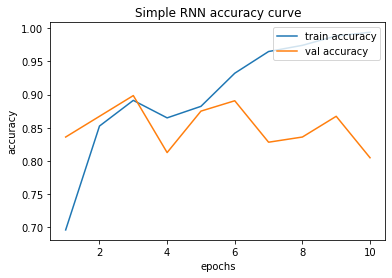

In [ ]:
plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.legend(["train accuracy", "val accuracy"], loc = "upper right")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.title("Simple RNN accuracy curve")

plt.show()

We can see that the accuracy of simple rnn increases with epochs for training data but it overfits and that can be seen with the validation curve.

In [ ]:
accuracy, loss = lstm_model_history.history["accuracy"], model_history.history["loss"]
val_accuracy, val_loss = lstm_model_history.history["val_accuracy"], model_history.history["val_loss"]

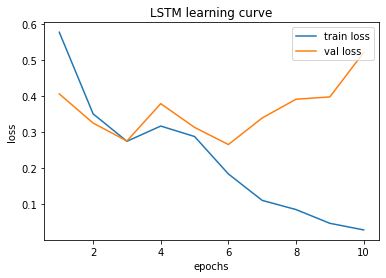

In [ ]:
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(["train loss", "val loss"], loc = "upper right")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.title("LSTM learning curve")

plt.show()

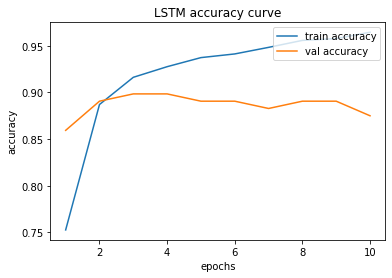

In [ ]:
plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.legend(["train accuracy", "val accuracy"], loc = "upper right")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.title("LSTM accuracy curve")

plt.show()